## Data Science Fundamentals 
# Lecture 1: Numerical Basics
## Numerical arrays and vectorized computation
----
 ##### DSF - University of Glasgow - Chris McCaig - 2021/2022
 
<!-- $$\newcommand{\vec}[1]{ {\bf #1}} 
\newcommand{\real}{\mathbb{R}}
\newcommand{\expect}[1]{\mathbb{E}[#1]}
\DeclareMathOperator*{\argmin}{arg\,min}
\vec{x}
\real$$ -->

# Moodle quiz: open during class only

# Summary
By the end of this unit you should know:

## 1: Why use arrays
* what vectorized computation is
* what numerical arrays are and what they are useful for
* the general categories of array operations
* how images and sounds map onto arrays

---

---

# Summary
By the end of this unit you should know:

## 2: Typing and shapes of arrays
* the naming of different types of arrays (vector, matrix, tensor)
* what shape and dtype are
* what axes of an array are and how they are named (row, column, etc.)
---

# Summary
By the end of this unit you should know:

## 3: Creating, indexing, slicing, joining and rotating
* creating new arrays
* slicing and indexing operations and their syntax
* how to rotate, flip and transpose arrays
* how to split and join arrays and the rules governing this
* boolean arrays and fancy indexing
---

In [ ]:
import IPython.display
IPython.display.HTML("""
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>""")

**Install Utilities**

You only need to run this command once, to install the library: remove '**#**' and run command

In [1]:
#!pip install -U --no-cache https://github.com/johnhw/jhwutils/zipball/master

     \ 36 kB 47 kB/sss
  Created wheel for jhwutils: filename=jhwutils-1.0-py3-none-any.whl size=31798 sha256=4a02568924d3aef679b57203aa090a0a7e6e2f05ef536bb3e7e1a3d11678ef91
  Stored in directory: /private/var/folders/kt/l7s39wy92jx8r7391478dkpc0000gn/T/pip-ephem-wheel-cache-gqzp1y1h/wheels/22/cf/fc/464198e5e7ba125a8fc9bb20e6297eb4deac9061eda6860554
Successfully built jhwutils


In [1]:
# various imports we will need
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import jhwutils.image_audio as image_audio
from jhwutils.image_audio import (
    play_sound,
    show_image,
    load_image_colour,
    load_image_gray,
    show_image_mpl,
    load_sound,
    play_sound,
)
from jhwutils.matrices import show_boxed_tensor_latex, print_matrix

%matplotlib inline
plt.rc("figure", figsize=(14.0, 7.0))

Unable to revert mtime: /Library/Fonts
/Users/ckane/opt/anaconda3/lib/python3.9/site-packages/IPython/kernel/__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


# Why use arrays?

# ndarray - Our basic datatype
There are several basic data types you will have encountered in CS so far, including:
* lists (sequence types)
* strings (character sequences)
* dictionaries/hash tables (maps)
* classes/structures (record types)
* trees 

----  

## ndarrays
The fundamental data type for this course is the **multidimensional numerical array** (of floating point numbers). This is a very powerful data type, although simple in structure, there are great many operations that can be done elegantly with an array.

We will call these arrays **ndarrays** (for *n-dimensional arrays*) or sometimes **tensors** (in reference to the mathematical object which generalises vectors and matrices to higher orders), which some people use. 


# Why use arrays?
### Images, sounds, videos
* An *image* is a 2D array of brightness values;
* a *sound* is a 1D array of sound pressure levels; 
* a *video* is a 3D array of brightness values (x, y, and time).

- Manipulations (e.g. brightening a video, mixing together two sounds, cropping a video, rotating a 3D model) are very straightforward to express in terms of array operations. 
- This leads to compact, elegant code that can be astonishingly efficient.

### Scientific data
Scientific data can be conveniently represented as numerical arrays. 

Operations we want to do to scientific data are easily expressed as array operations.


### 3D graphics
3D computer graphics involves manipulating **geometry**. 

Geometry is specified as simple geometric shapes, like triangles, made up of points -- **vertices** -- typically with an $[x,y,z]$ location. 

Operations like moving, rotating, scaling of objects are operations on big arrays of these vertices.

### Scientific data
Scientific data (e.g. from physics experiments, weather models, even models of how people choose search terms on Google) can often be most conveniently represented as numerical arrays. The kind of operations we want to do to scientific data (e.g. find the weather most similar today in the historical record) are easily expressed as array operations.


### 3D graphics
3D computer graphics, as you would encounter in a game or VR, usually involves manipulating **geometry**. Geometry is typically specified as simple geometric shapes, like triangles. These shapes are made up of points -- **vertices** -- typically with an $[x,y,z]$ location. Operations like moving, rotating, scaling of objects are operations on big arrays of these vertices:

    vec3 player = [
            [x,y,z]
            [x,y,z]
            ...
        ]
    
<img src="imgs/low_poly.jpg">  

Manipulating positions in space efficiently is important in making computer graphics programming work.

#### Abstraction and elegance
By using a numerical array, we can extend operations we apply to single numbers (like integers or floats) to entire arrays of numbers: 

e.g. if we have an array of 100 3D positions `pos`, it would be very nice if we could scale all of the points by a factor of 2 (double in size) and move the whole array 100 units right like this:

    pos = pos * 2 + [100,0,0]
    

This very clearly expresses the operation to be performed. Applying an identical operation to many elements of an array simultaneously is a very useful operation. 

Code which can express this type of operation without explicit loops is a easier to read and write. Consider the alternative:
    
    new_pos = []
    for x,y,z in pos:
        new_pos.append((2*x+100, 2*y+0, 2*z+0))
    pos = new_pos

### Mathematical power
Rich set of mathematical abstractions that work on spaces defined over array-valued elements: 

- **linear algebra** provides tools to work with 1D arrays (*vectors*) and 2D arrays (*matrices*) 
- can be used to solve many difficult problems. 
- with types represented as basic types in a programming language working with linear algebraic problems is much easier.

#### Deep learning
"Deep learning" has had a major impact in the last ten years:
* Cutting edge speech synthesis: wavenet
* State of the art image recognition: inceptionnet
* Auto captioning images: image-from-text
* Recognising sentiment from words: word2vec
* Synthesizing images: stackgan

Key to deep learning is to represent data as arrays of numbers and to do **all** computations as array operations: 

- i.e. perform operations that act on all elements of an array simultaneously.

### Vectorisation: one operation, many data
Writing code that acts on arrays of values simultaneously is called **vectorised computation**. 

This a special case of **parallel** computing: 

- restrict ourselves to numerical operations on fixed size arrays 
- modern CPUs have many **vectorised** instructions 
- can perform the same operation on many numbers at once (e.g. MMX, SSE, SSE2, SSE3 on x86, NEON on ARM, etc.)
- this is called **Single Instruction Multiple Data**.

#### GPUs
**Graphics processor units** are by far the most powerful computational units in any modern computer/phone: 
- essentially supercomputers on a card 
- can perform calculation  much more quickly than CPU 
<img src="imgs/gtx-1070.jpg" alt="Drawing" style="width: 500px;"/>

#### GPUs are array processors
**But** effectively big groups of very simple processors 
- able to deal very well with data in numerical arrays
- slow when working with other data structures 
- anything that can be written as an array operation can be done at lightning speed on a GPU. 


- GPUs are basically devices that can do computations on numerical arrays, **and that's it** 
- to write (efficient) GPU code, you need to write code in terms of numerical arrays


### Efficiency
Numerical arrays are **compact** (they store data in an efficient way) and **computationally efficient** (possible to write code that manipulates arrays quickly)

<video src="imgs/noaa.mp4" autoplay loop controls width="50%">

*[Image credit: NOAA, Public domain]*

For big, number-focused problems like:
* weather simulation
* image processing
* speech recognition
* machine learning

arrays are the best way we have of solving these problems. 

In big, text-heavy problems with irregular structure, databases are a more natural structure to store and work with data.

<img src="imgs/spread.png" width="25%">

Array types are like entire *spreadsheets in a single variable*, which you can perform standard spreadsheet operations on:
* tallying up columns 
* selecting values which have a certain range
* plotting charts
* joining together several sheets 

Abstraction of array types makes it easy to do complex operations with a standard spreadsheet. And they work on data beyond just 2D tables.

## Typing and shapes of arrays
### Vector, matrix, tensor
**ndarrays** can have different *dimensions*; sometimes called *ranks*, as in a "*rank-3 tensor*" or "3D array" , meaning an array with rows, columns and channels.

<img src="imgs/ranks.png" width="350px">

In [ ]:
# a vector of length 1
[0]

# a vector of length 3
# (e.g. a position in 3D space)
[1, 2, 3]

# a vector of length 8
[0, 0, 0, 0, 1, 0, 0, 0]

In [ ]:
show_boxed_tensor_latex(np.array([0, 1, 2, 3]))

#### Vector
We call a 1D array of values a **vector**: for example:

    #a 3 element vector
     [1,2,3]

#### Matrix
A 2D array of values is called a **matrix**, and is formed of rows and columns:

    #a 3 x 3 matrix
     [[1,2,3],
      [4,5,6],   
      [7,8,9]]


#### Tensors

Any array with more than 2 dimensions is just called an **nD array**  (**n d**imensional array) or sometimes a **tensor**. There isn't a convenient mathematical notation for tensors.

    # a 2 x 3 x 3 tensor
    [[[1,2,3],
      [4,5,6],   
      [7,8,9]],
      
      [10,11,12],
      [13,14,15],   
      [16,17,18]]]

Often easiest to think of tensors as arrays of matrices or vectors (e.g a 3D tensor is really a stack of 2D matrices, a 4D array is a grid of 2D matrices, a 5D array is a stack of those grids, etc.)

    # a 2 x 2 x 3 x 3 tensor 
    # notice how it is really a 2x2 array,
    # with each element being a 3x3 subarray
        [[[[ 1  2  3]     [[[19 20 21] 
           [ 4  5  6]       [22 23 24]
           [ 7  8  9]]      [25 26 27]]

          [[10 11 12]      [[28 29 30]         
           [13 14 15]       [31 32 33]
           [16 17 18]]]     [34 35 36]]]]
           
Typically don't encounter tensors with more than 6 dimensions
- these would require enormous amounts of memory to store 
- don't correspond to many real-world use cases. 

## Axes
Often refer to specific dimensions as **axes** or **dimensions**: e.g.
- a matrix (a 2D array) has two axes: **rows** (axis 0) and **columns** (axis 1)
- a vector has just one axis, axis 0. 
- a 4D tensor has 4 axes, indexed 0, 1, 2, 3.

Many operations can be selectively applied only on certain axes 
- very useful way to specify the effect of an operation.

# Array operations
Unlike data structures you are familiar with (lists, dictionaries, strings), there are **many** operations defined on arrays 
- some are convenience operations
- but there are many fundamental operations as well

## Array operations
- Generalise ideas we have seen on sequence types to sequences across multiple dimensions 
- means we can do things like slicing or summing elements, but over *independent dimensions*
- these will be very *very* fast, and memory efficient.

The most important classes of operations that we will cover are:

* **Slice**: slice out rectangular regions, for reading or writing.
    * Chop out second to tenth rows of a 2D matrix: `x[1:9, :]`
    * Set the second column to 0 `x[:,1] = 0`
* **Filter**: find values matching criteria.
    * select elements of x where x is negative `x[x<0]`
* **Reduce**: aggregate across dimensions.
    * compute sum of each column;  `np.sum(x, axis=0)`
* **Map**: apply functions or arithmetic operations elementwise
    * add 1 to every element of x `x+1` 
    * add x and y `x+y` 
    * take the sine of every element of x `np.sin(x)`

* **Concatenate and repeat**:
    * stick x and y together one on top of the other; np.concatenate([x,y], axis=0)
    * repeat x 8 times across the columns; np.tile(x, [1,8])
* **Generate**:
    * create arrays of all zeros: `np.full((8,8),0)`
    * create "counting" arrays: `np.arange(10)`
    * load arrays from files or save them to disk.
* **Reorder**
    * reverse/flip axes
    * sort axes
    * exchange rows/columns (transpose)
    

### No explicit iteration


We operate on arrays without writing explicit iterations wherever possible. This has two effects:

* The code is **much simpler**. Adding two arrays with `c=a+b` is simpler than:

        for i in range(n):
            for j in range(m):
                c[i][j] = a[i][j] + b[i][j]
                
* The code is **much faster**. The operations can be run in accelerated routines, or with hardware acceleration, e.g. on the GPU.
    

## Vectors and matrices
As well as being convenient to implement in silicon, arrays correspond to rich mathematical objects.
### Geometry of vectors
1D arrays can be used to represent vectors, which have a mathematical structure that is essential in: 
- modeling physical systems
- building information retrieval systems
- machine learning
- 3D rendering 

### Geometry of vectors
Vectors have length and direction:
- they can be added, subtractedor scaled 
- various products are defined on vectors. Arrays are often used to represent vectors; for example a 2D array might be used to store a sequence of vectors (perhaps positions in space), which could be operated on simultaneously.

We write a vector a bold letter lower case symbol: $\bf x$ (other notations include an arrow or bar above an upper case symbol).

### Signal arrays
1D arrays can also be used to represent **signals** 
- sequences of measurements over time 
- signals include images, sounds, and other time series
- signals can be scaled, mixed, chopped up and rearranged, filtered, and processed in many other ways.

The use of arrays to represent sequences and vectors is not exclusive; some operations use both representations simultaneously. We typically write a signal as $x[t]$.

### Algebra of matrices
2D arrays are matrices, which have an algebra: **linear algebra**
- a matrix represents a **linear map**, a particular kind of function which operates on vectors (in **vector space**)
- the operation of the function is completely defined by the elements of that matrix. 

Linear algebra is extremely rich can is used to perform many essential computations
- 3D rendering involves matrix operations (e.g. coordinate transformation)
- it has many interesting features
-- multiplication **applies** the map when multiplying with vectors
-- **composes** the map when multiplying with other matrices. 

We write a matrix as an upper case symbol $A$. 
    

### Mathematical operations
We have specialised mathematical operations we can apply to arrays
* **Vector operations**: apply geometric effects to vectors: dot product, cross product, norm
    * e.g. getting the Euclidean length of a vector
* **Matrix operations**: linear algebra operations like multiplication, transpose, inverse, matrix exponentials, decompositions
    * e.g. multiplying together two 3D transformation matrices
* **Signal processing operations**: convolution, Fourier transform, numerical gradients, cumulative summation
    * e.g. blurring an image using a convolution

------     
## Statically typed, rectangular arrays: **ndarrays**

**ndarrays** (n-dimensional arrays) represent sequences. However, arrays are not like lists. 

They have
* **fixed, predefined** size (or "shape")
* **fixed, predefined** type (all elements have the same type)
* they can only hold numbers (typically integers or floating-point)
* they are inherently multidimensional
* they are required to be "rectangular" -- a 2D array must have the same number of columns in each row, for example.

Valid array:

    1,0,0   # each row has three elements
    0,1,0
    0,0,1
    
Invalid array:

    1,0,0,0,0   # 5 elements
    0,1         # 2 elements
    0,0,1       # 3 elements
    
* type of array has to be specified very precisely; e.g. specify the precision of floating point numbers if we use floats (usually 32 or 64 bits).

* arrays cannot be extended or resized after they have been created

* arrays **are** typically mutable, the values they hold can be changed after creation

### Why do we have to type arrays?

Python is dynamically typed and doesn't require types to be specified. 

But the elements **within** the array are **not** Python values
- stored as a block of "raw numbers"
- with information that tells us e.g. the dimensions of the array
     - the type of the elements
- entire array is one *single* value
- through some clever syntax it *looks* as if it is made up of individual (Python values)
- access and change the values *as if* they were Python values, but internally they are quite different.

#### Reasons for typing
**ndrrays**: wrapper around raw blocks of memory
- this makes them compact and efficient.

- numerical arrays are **much** more efficiently packed into memory
- operations on them can be performed **extremely** quickly 

- same is true for other platforms and languages
    - numerical arrays are implemented to be the fastest and smallest possible structure for representing blocks of numbers

# Practical array manipulation
## NumPy

We use Python with some additional modules 
- **NumPy** which provides fast array operations
- **SciPy** which provides a range of scientific functionality (e.g. statistics) 
- **Matplotlib** which provides plotting and visualisation functionality.

It has very high performance routines for computations (based on optimized Fortran+C code) and an easy to use API.

#### Other languages
Other languages have numerical libraries which support similar functionality to NumPy
- either as built-in features (e.g. Matlab, R, APL, Julia) 
- or as external libraries (e.g. Eigen for C++, MKL for C, ND4J for Java)

We use NumPy throughout this course (mainly because it is by far the easiest to use option!) 
- the fundamental ideas generalise outside of the Python ecosystem. 
- operations we use are standard operations on arrays, not special to NumPy

We usually import it like this:

## Shape and dtype
Every array is characterised by two things:
* the type of its elements: the **dtype** (e.g.` float64`)
* its **shape**: that is, its dimensions. For example, 32x8

### Order
We always discuss the shape of arrays in the order
* rows
* columns
* depth/frames/channels/planes/...

**This ordering is important: remember it!**

So a 2x3 array means 2 rows, 3 columns:
$$\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}$$

A 3x2 array means 3 rows, 2 columns:
$$\begin{bmatrix}
0 & 0  \\
0 & 0  \\
0 & 0  \\
\end{bmatrix}$$


A 32x8 array has 32 rows of 8 columns each. It has 256 elements (`32*8=256`) in total.

### Indexing and axes
We index from **0**, so element [0,1] of an array means *first row, second column*.

The **dimensions** of an array are often called its **axes**. Do not confuse this with axes or dimension of a vector space! The number of dimensions of an array is sometimes called its **rank** (this is distinct from the concept of *rank* in linear algebra, if you are familiar with this). 

* A scalar is a rank 0 tensor
* A vector is a rank 1  tensor (1 dimensional array)
* A matrix is a rank 2 tensor (2 dimensional array)
* A stack of matrices is a rank 3 tensor (3 dimensional array)
* and so on...

## Dtypes
**dtype** just stands for the *d*ata *type*, and it is the data type of every element in an array (what kind of number it is). For the moment, we will assume we get floating point elements in our arrays: we'll discuss this in more detail later. Every element has the same *dtype*; it applies to the whole array.

Common *dtypes* are:
* `float64` double-precision float numbers
* `float32` single-precision float numbers
* `int32` signed 32 bit integers
* `uint8` unsigned 8 bit integers

though there are many more.


We can interrogate an array to see its *shape* and *dtype*:

In [ ]:
x = np.zeros((3,3))
print('dtype =',x.dtype)
print('shape = ', x.shape)

## Images and sounds
Images and sounds are classic examples of arrays. They are naturally manipulated using array abstractions.
For example, we can load an image from disk, and its `shape` will be its resolution:

In [ ]:
from matplotlib.image import imread

img = imread('imgs/rocks.png')
print(type(img),'shape = ',img.shape)

As we will see in detail later, we can for example plot this data array in one go:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(sunspots[:,1], sunspots[:,2])
ax.set_xlabel("Year")
ax.set_ylabel("No. of sunspots")

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(snd)
ax.set_xlabel("Samples")
ax.set_ylabel("Amplitude (normalised)")

# Array ops: creation, indexing, slicing, joining and rotating


---
## Creating arrays
### Converting and copying: np.array
New arrays can be created in several ways:

* Converted from another sequence type, like a list: `np.array()` does this.
* Created blank and filled with some value.  This is often essential in creating temporary variables, for example to accumulate results into.
* Filled with random values.
* Loaded from disk.

`np.array()` takes a sequence and converts it into an array; this can be, for example, a list.
It works for multidimensional arrays as well, given nested sequences. 

## Mutability and copying
`np.array()` can take any sequence, including another ndarray. So it can be used to copy arrays:

This is important, because NumPy arrays are **mutable**, and if several variables refer to the **same** array, the effects might not be what you expect:

In [ ]:
x = np.array((0,1,2,3,4))
print_matrix("x",x)
y = x
x[0] = 5
print_matrix("x(after)",x)
print_matrix("y",y)

We need to explicitly copy arrays if we want to work on a new array:

In [ ]:
x = np.array((0,1,2,3,4))
print_matrix("x",x)
y = np.array(x)
x[0] = 5
print_matrix("x(after)",x)
print_matrix("y",y)

In [ ]:
x = np.array([1,2,3])
y = np.array(x) # copy
z = x.copy() # same thing as using np.array(x)
x[0] = 0
print_matrix("x",x) # 0 2 3
print_matrix("y",y) # still 1 2 3
print_matrix("z",z)

### Ragged arrays (bad!)
What happens if we **don't** follow the rectangular array rule?

In [ ]:
x = ((1,2,3),(1,2,3,4))
x

In [ ]:
y=np.array(x)

In general, *never* create ragged arrays. Always make sure you are creating rectangular arrays!

# Blank arrays

There are a number of methods all of which do essentially the same thing; allocate a new array with a given shape, and possibly fill it with a value.

* `np.empty(shape)`, which allocates memory for an array, but does not initialise it
* `np.zeros(shape)`,  which initialises all elements to 0
* `np.ones(shape)`,  which initialises all elements to 1
* `np.full(shape, value)` which initialises all elements to `value`

These are just calling `np.empty(shape)` to create a new array and then filling it with a given value.

For example, `x = np.ones((5,8))` is exactly the same as:

In [ ]:
x = np.empty((5,8))
x[:] = 1
print_matrix("x",x)

### Blank like
Similarly, we can create blank arrays with the same shape and dtype as an existing array using the `_like` variants. `y = np.zeros_like(x)` is exactly the same as:

    y = np.empty(x.shape, dtype=x.dtype)
    y[:] = 0.0  

### Random arrays
We can also generate random numbers to fill arrays. Many algorithms use arrays of
random numbers as their basic "fuel". 

* `np.random.randint(a,b,shape)` creates an array with uniform random *integers* between a and (excluding) b
* `np.random.uniform(a,b,shape)` creates an array with uniform random *floating point* numbers between a and b
* `np.random.normal(mean,std,shape)` creates an array with normally distributed random floating point numbers between with the given mean and standard deviation.


# Ranges

## arange
We can create a vector of increasing values using `arange` (**a**rray **range**), which works like the built in Python function `range` does, but returns an 1D array (a vector) instead of a list.

`np.arange()` takes one to three parameters:
* `np.arange(end)`  -- returns a vector of numbers 0..end-1
* `np.arange(start, end)`  -- returns a vector of numbers start..end-1
*  `np.arange(start, end, step)` --returns a vector of numbers start..end-1, incrementing by step (which may be **negative** and/or **fractional**!)


In [ ]:
print_matrix("np.arange(5)",np.arange(5))

In [ ]:
print_matrix("np.arange(2,5)",np.arange(2,5))

In [4]:
print_matrix("np.arange(0,10,2)",np.arange(0,10,2))

<IPython.core.display.Latex object>

### Linspace
`np.arange` is useful for generating evenly spaced values, but it is parameterised in a form that can be awkward. 

`np.linspace(start, stop, steps)` is a much easier to use alternative. `linspace` stands for "**lin**early **space**d", and it generates `steps` values between `start` and `stop` **inclusive**. 

In [2]:
print_matrix("np.linspace(0,4,5)",np.linspace(0,4,5))

<IPython.core.display.Latex object>

### Loading and saving arrays
I/O with arrays is a critical part of any numerical computation system. There are a huge number of ways to store and recall arrays, including:
* simple text formats like CSV (comma separated values)
* binary formats for storing single or multiple arrays like mat and npz
* specialised scientific data formats like HDF5 (often used for huge datasets)
* domain-specific formats like images (png, jpg, etc.), sounds (wav, mp3, etc.), 3D geometry (obj, ...)

#### Text files
*  `np.loadtxt(fname)` and 
* `np.savetxt(arr, fname)` 

work on simple text files.

In [5]:
x = np.loadtxt('data/Wheat.csv',delimiter=',')
print(x.shape)

np.savetxt("data/mydata.csv",x)

(50, 4)


# Slicing and indexing arrays
Arrays can be indexed like lists or sequences (in Python, this uses square brackets []), but arrays can have **multidimensional** indices. These are indices which are really tuples of values.

This means we write the variable, with the index in square brackets, where the index might have comma separated values. Indices start at **zero**!

In [6]:
wheat = np.loadtxt('data/Wheat.csv',delimiter=',')
print_matrix("wheat[:3,:3]",wheat[:3,:3])

<IPython.core.display.Latex object>

Indexing, and its counterpart slicing, are two of the most important array operations.

The general format follows the same principles as `arange()`, taking 0-3 parameters separated by a `:`

    start : stop : step
    
Where `start` is the index to start from, `stop` is the end, and `step` is the jump to make between each step. **Any of these parts can be omitted**.

* If there is no colon, this specifies a specific index, for example x[0] or x[18]
* If there is one colon, this is a range; for example x[2:5] or x[:4] or x[0:]
* If there are two colons, this is a range with a step, like x[0:10:2], or x[:10:2] or x[::-1]

* If `start` is missing, it defaults to 0
* If `end` is missing, it defaults to the last element
* If `step` is missing, it defaults to 1. You don't need to include the second colon if you are omitting step, though it's not an error to do so.



#### Negative indices
Negative indices mean *counting from the end*; so `x[-1]` is the last element, `x[-2]` is the second last, etc.

If we specify an axis as an index (no range), we get back a  **slice** of that array, with fewer dimensions. If `x` is 2D, then `x[0,:]` is the first row (a 1D vector), and `x[:,0]` is the first column (a 1D vector).

### Slicing versus indexing

* **Slicing** does not change the rank of an array. It selects a rectangular subset with the same number of dimensions.
* **Indexing** reduces the rank of an array (usually). It selects a rectangular subset where one dimension is a singleton, and removes that dimension.

In [ ]:
x=np.arange(20)
x.shape=(4,5)
print_matrix("x[:,::2]",x[:,::2])

In [ ]:
print_matrix("x[:,2]",x[:,2])

In [ ]:
x=np.arange(20)
x.shape=(4,5)
print_matrix("x[:,::2]",x[:,::2])

### Sounds
Likewise, we can chop out a bit of a sound by slicing, or even reverse it and pitch it up:

In [ ]:
snd = load_sound("sounds/guitar.wav")
play_sound(snd)  # original

In [ ]:
play_sound(snd[4000:18000]) # slice

In [ ]:
play_sound(snd[::-1]) # backwards

In [ ]:
play_sound(snd[::2]) # double speed (horrible interpolation+aliasing artifacts)

## Boolean tests
We can do any test (like equality, greater than, etc.) on arrays as well: the result is a **Boolean array**, with the same shape as the original array (despite how they appear, these are actually numeric arrays internally):

In [8]:
x=np.arange(20)
x.shape=(4,5)
print_matrix("x>10",x>10)

/Users/ckane/opt/anaconda3/lib/python3.9/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


<IPython.core.display.Latex object>

## Rearranging arrays

Arrays can be transformed and reshaped; this means that they keep the same elements, but the arrangements of the elements are changed. For example, the sequence 
    
    [1,2,3,4,5,6]
    
could be rearranged into

    [6,5,4,3,2,1]

which has the same elements but now ordered backwards. 

These operations are often very useful to rearrange arrays so that broadcasting operations can be carried out effectively.


In [9]:
x=np.arange(7)
x[::-1]

array([6, 5, 4, 3, 2, 1, 0])

## Transposition
A particularly useful transformation of an array is the **transpose** which exchanges rows and columns (this isn't the same as rotating 90 degrees!). There is special syntax for this because it is so often used:

We write `x.T` to get the transpose of `x`.

In [10]:
x=np.arange(20)
x.shape=(4,5)
print_matrix("x.T",x.T)

<IPython.core.display.Latex object>

Transposition has *no effect* on a 1D array, and it reverses the order of all dimensions in >2D arrays.

Note that transposing is a very fast operation -- it does not (normally) copy the array data, but just changes how it is accessed, and thus has virtually no time penalty, and completes in O(1) time. We will discuss how this is possible in the next lecture.

In [ ]:
## show that transpose is fast, and does not depend on array sizze
x300 = np.zeros((300,300))
x3 = np.zeros((3,3))

In [11]:
%%timeit
x3.T

NameError: name 'x3' is not defined

In [ ]:
%%timeit
x300.T

### Flip, rotate
As well as transposition, arrays can also be flipped and rotated in a single operation using indexing (there are also convenience functions like `fliplr` and `rot90` but we will keep it simple here):
    

In [13]:
x=np.arange(20)
x.shape=(4,5)
print_matrix("x[::-1,::]",x[::-1,::],"\n")
print_matrix("x[::,::-1]",x[::,::-1],"\n")

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
print_matrix("x", x)

# left-right flip
print_matrix("\\text{fliplr}(x)", x[:, ::-1]) # ::-1 --> reverse order
# up-down flip
print_matrix("\\text{flipud}(x)", x[::-1, :])

# rotate 90 (same as transpose + flipud)
print_matrix("\\text{rot90}(x)", x.T[::-1, :])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

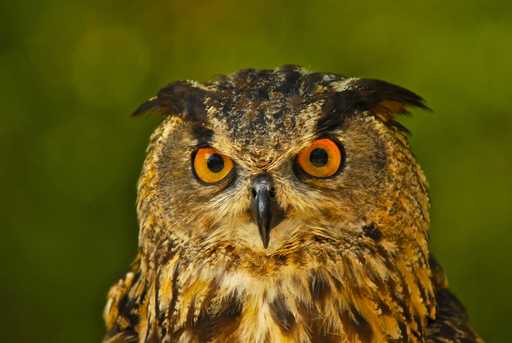

In [15]:
owl = load_image_colour("imgs/owl.png")
show_image(owl, width="50%")

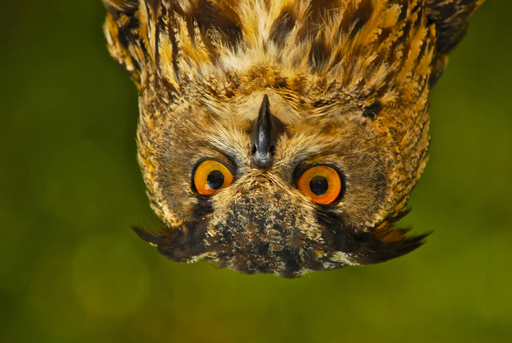

In [16]:
# flip up-down
show_image(owl[::-1, :], width="50%")

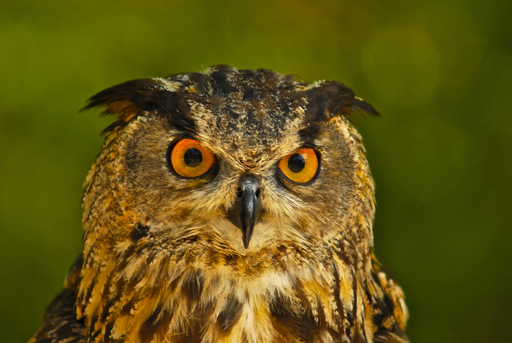

In [17]:
# flip left-right
show_image(owl[:,::-1], width="50%")

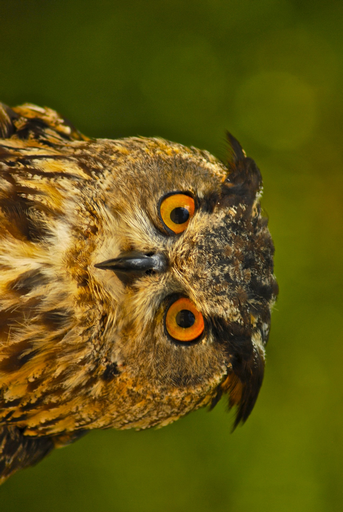

In [18]:
# rotate 90
show_image(owl[::-1, :].swapaxes(0,1), width="50%")

#### Symmetric owls

In [ ]:
# split the owl into a left and right half
h,w,d = owl.shape

left = owl[:, :w//2, :]  # //2 just means integer division by 2 (i.e. no floating point part)
right = owl[:, w//2:, :]
## we'll see concatenate in a moment
show_image(np.concatenate([left, left[:,::-1]], axis=1), width="50%")

# Cut+tape operations
## Joining and stacking
We can also join arrays together. But unlike simple structures like lists, we have to explicitly state on which **dimension** we are going to join. And we must adhere to the rule that the output array has rectangular shape; we can't end up with a "ragged" array. (arrays are *always* rectangular)

<img src="imgs/join.png" width="240px">

<img src="imgs/join2.png" width="240px">

### concatenate and stack
Because arrays can be joined together along different axes, there are two distinct kinds of joining:
* We can use `concatenate` to join along an *existing* dimension;
* or `stack` to stack up arrays along a *new dimension.*

In [ ]:
x=np.arange(4)
x.shape=(2,2)
print(np.concatenate((x,x),axis=0),"\n")
print(np.concatenate((x,x),axis=1),"\n","\n")
print(np.stack((x,x)))

If we `concatenate` when we have multiple dimensions, we can specify explicitly
which axis to join on:

### 2D matrix stacking shorthand

As a shorthand, there are three defined stacking operations for specific axes when working with 2D matrices:
* `np.hstack()` stacks horizontally
* `np.vstack()` stacks vertically
* `np.dstack()` stacks "depthwise" (i.e. one matrix on top of another)

All of these operate on 2D matrices

In [ ]:
x=np.arange(4)
x.shape=(2,2)
print(np.vstack((x,x)),"\n")
print(np.hstack((x,x)),"\n\n")
print(np.dstack((x,x)))

## Tiling
We often need to be able to **repeat** arrays. This is called **tiling** and `np.tile(a, tiles)` will repeat `a` in the shape given by `tiles`, joining the result together into a single array.

In [ ]:
x=np.arange(4)
x.shape=(2,2)
np.tile(x,(2,2))

# Selection and masking
Comparisons between arrays result in Boolean arrays, as we have seen:

In [ ]:
x=np.arange(5)
x==x[::-1]

These Boolean arrays have many useful applications in **selecting** specific data, or alternatively **masking** specific data. Selection and masking are basic operations.

## where, nonzero
We can use a Boolean array to select elements of an array with `np.where(bool, a,b)` which selects `a` where `bool` is True  and `b` where `bool` is False. `bool`, `a` and `b` must be the same shape, or be broadcastable to the right shape.

In [ ]:
x=np.arange(5)
np.where(x>2,x**2,x)

#### nonzero
We can convert a boolean array to an array of **indices** with `nonzero`

In [ ]:
x=np.arange(5,0,-1)
np.nonzero(x>2)

## Fancy indexing
An extension of indexing, which allows us to index arrays with arrays
- very powerful operator
- we can select *irregular* parts of an array and perform operations on them

### Index arrays
For example, an array of **integer** indices can be used as an index directly:

In [ ]:
x = np.array([10, 20, 30, 40])
y = np.array([0, 1, 1, 2, 2, 1])
print_matrix("x", x)
print_matrix("y", y)
print_matrix("x[y]", x[y])

In [ ]:
x2d = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
y = np.array([0, 1, 1])
## indexes as row slices
print_matrix('x', x2d)
print_matrix('y', y)
print_matrix('x_{2d}[y]', x2d[y])

Dimensions are always still separated by commas:

In [ ]:
z2d = np.array([0,0,2])
## indexes as row slices
## TRICKY: we index first by y2d (to get the array above), *then* by z2d to select the columns
print((x2d[y, z2d]))

In [ ]:
## find indices where wheat price was > 50
expensive_indices = np.nonzero(wheat[:,2]>50)

# print the matching years
print((wheat[:,1][expensive_indices]))

### Boolean indexing
As well as using indices, we can directly index arrays with boolean arrays.


For example, if we have an array 

    x = [1,2,3]
    
and an array
   
    bool = [True, False, True]
   
then `x[bool]` is the array:

    [1,3]
    
Note that this is pulling out *irregular* parts of the array (although the result is always guaranteed to be a rectangular array).    


In [ ]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([1, 0, 1, 1, 0, 0, 1, 1])
print_matrix("x", x)
print_matrix("y", y)
print_matrix("x[y==0]", x[y == 0])

In [ ]:
# boolean arrays in broadcasting
x2d = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90]])

y = np.array([10, 20, 100])
first_column_bigger = x2d[:, 0] <= y

print_matrix("x", x2d)
print_matrix("y", y)

print_matrix("x[x[:,0]\leq y]", x2d[first_column_bigger])
# select the rows where the first column of x is <= correspond element of y

In [ ]:
# the wheat example, selecting years when the cost of wheat was > 50 shillings / quarter bushel
print((wheat[:,1][wheat[:,2]>50])) # note the double indexing

In [ ]:
owl_gray = load_image_gray("imgs/owl.png")

# force to either black (0) or to white (1), by thresholding at 0.2
show_image(np.where(owl_gray<0.2, 0, 1), width="50%")

In [ ]:
owl_masked = np.array(owl_gray) # copy the owl
# we can use fancy indexing in assignments, exactly as we would in any other operation
owl_masked[owl_masked<0.5] *= 0.6 # make the dark bits darker
owl_masked[owl_masked>0.5] *= 1.6 # and the light bits lighter

show_image(owl_masked, width="50%")

## Selection review

* **Slicing** can chop out rectangular sections of an array, including with regular gaps. `x[2:5, :]` selects rows 3-6 of `x`. `x[:, :, ::-1]` selects all of `x`, but with the last axis reversed (e.g RGB colours -> BGR colours). 

* **Specific indexing** We can index anywhere we could specify a slice range with a list instead. This allows quick tricks to rearrange elements. `x[[0, 2, 1], :]` will return an array with the first, third and second rows of `x`, in that order. 

* **Boolean indexing** or **masking**. if we index an array with a Boolean array instead of a slice range, we will get all of the elements where that array was True. This is particularly useful in assignments. We can, for example, write `x[x > 5] = 0` to set all value of `x` that are greater than 5 to 0. 

---



---

## Key Resources

* [A visual guide to NumPy](https://jalammar.github.io/visual-numpy/) This is an excellent intro that covers most of the concepts here.
* [NumPy tutorial](http://scipy.github.io/old-wiki/pages/Tentative_NumPy_Tutorial)

See the **Resources** page on Moodle for a full list of resources, including some more advanced material for those who are interested.


-----

# NumPy reference

This is a quick reference guide. **We won't cover this in the lecture.**


### NumPy reference
In DF(H) We will use the following NumPy functions/functionality. You should know
what these functions do and be ready to use them by the end of the first week.

These are [all covered in the NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html)

* multidimensional slicing syntax `x[1,2:5]`
* broadcasting arithmetic `x+4`
* slice assignment `x[0:5] = 1`
* boolean indexing `x[[True, False, False]]`
* [fancy indexing](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) `x[y] += 1` 

### Generation
* `np.loadtxt` / `np.savetxt`
* `np.zeros` / `np.ones` / `np.full` / `np.empty`
* `np.zeros_like` / `np.zeros_like` / `np.full_like` / `np.empty_like`
* `np.arange`
* `np.linspace`
* `np.array`
* `np.meshgrid`

### Logical
* `np.logical_and` / `np.logical_or` / `np.logical_not`

### Reductions
* `np.any` / `np.all`
* `np.prod`
* `np.min` / `np.max`
* `np.sum` / `np.mean` / `np.std`

### Accumulations
* `np.cumprod` / `np.cumsum`
* `np.diff` / `np.gradient`

### Random
* `np.random.uniform` / `np.random.normal` / `np.random.randint`
*  `np.random.choice` / `np.random.permuation`

### Reshaping
* `np.tile`
* `np.transpose`  / `x.T`
* `np.stack` / `np.concatenate`
* `np.squeeze`
* `np.reshape`
* `np.einsum`
* `np.ravel`
* `np.swapaxes` / `np.rollaxes`


### Floating point handling
* `np.isinf` / `np.isnan` / `np.isfinite`
* `np.nan` / `np.inf`
* `np.allclose`
* `np.frexp`

### Index finding and sorting
* `np.argmin` / `np.argmax` 
* `np.argsort` / `np.sort`
* `np.nonzero`
* `np.where`

### Matrix operations
* `np.dot` / `np.inner` Inner of vectors / matrices / tensors
* `np.outer` Outer product

### Standard functions (ufuncs)
* `np.minimum`, `np.maximum` (elementwise min/max)
* `np.add`, `np.subtract`, `np.multiply` (function forms of + and -)
* `np.log`, `np.exp`
* `np.sin`, `np.cos`, `np.tan`, `np.arcsin`, `np.arccos`, `np.tanh`, etc.

